# Jonathan Halverson
# Saturday, December 16, 2017
# Very simple test of digits since other notebook not working

This notebook revealed that the problem with the other code is that tf.squeeze was not applied to prob_positive in defining the loss.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

### Load MNIST

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
height, width = 28, 28

### Test set

In [4]:
msk = (mnist.test.labels == 0) | (mnist.test.labels == 1)
X_test = mnist.test.images[msk]
y_test = mnist.test.labels[msk].astype(np.int32)

In [5]:
y_test.shape

(2115,)

In [6]:
y_test

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [7]:
X_test.shape

(2115, 784)

In [8]:
X_test[:3]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

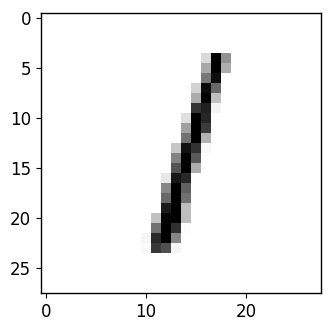

In [9]:
plt.imshow(X_test[0].reshape(height, width), cmap='binary')

In [10]:
y_test[0]

1

### Validation set

In [11]:
msk = (mnist.validation.labels == 0) | (mnist.validation.labels == 1)
X_valid = mnist.validation.images[msk]
y_valid = mnist.validation.labels[msk].astype(np.int32)

In [12]:
X_valid.shape

(1042, 784)

In [13]:
y_valid.shape

(1042,)

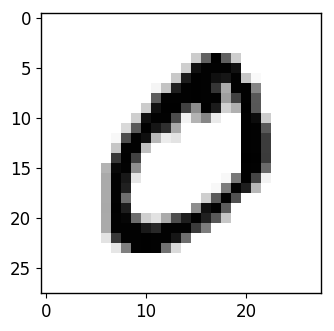

In [14]:
plt.imshow(X_valid[0].reshape(height, width), cmap='binary')

In [15]:
y_valid[0]

0

### Train set

In [16]:
msk = (mnist.train.labels == 0) | (mnist.train.labels == 1)
X_train = mnist.train.images[msk]
y_train = mnist.train.labels[msk].astype(np.int32)

In [17]:
X_train.shape

(11623, 784)

In [18]:
y_train.shape

(11623,)

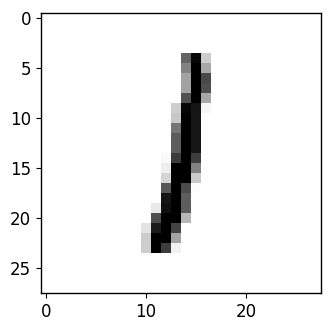

In [19]:
plt.imshow(X_train[0].reshape(height, width), cmap='binary')

In [20]:
y_train[0]

1

In [21]:
X_train.min(), X_train.max()

(0.0, 1.0)

### Tensorflow

In [22]:
tf.reset_default_graph()

In [23]:
X = tf.placeholder(dtype=tf.float32, shape=(None, height * width))
y = tf.placeholder(dtype=tf.int32, shape=(None))

In [24]:
prob_positive = tf.layers.dense(X, units=1, activation=tf.sigmoid, name='single_neuron')
loss = tf.losses.log_loss(labels=y, predictions=tf.squeeze(prob_positive))

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
training_op = optimizer.minimize(loss)

In [26]:
y_pred = tf.cast(tf.squeeze(prob_positive) > 0.5, tf.int32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(y, y_pred), tf.float32))

In [27]:
init = tf.global_variables_initializer()

In [28]:
n_epochs = 10000

In [29]:
with tf.Session() as sess:
     init.run()
     for epoch in xrange(n_epochs):
          sess.run(training_op, feed_dict={X:X_valid, y:y_valid})
          if not (epoch % 1000): print sess.run([loss, accuracy], feed_dict={X:X_test, y:y_test})

[0.48143753, 0.84917259]
[0.0046506044, 0.99905437]
[0.003697044, 0.99905437]
[0.003307739, 0.99905437]
[0.0030842056, 0.99905437]
[0.0029387036, 0.99905437]
[0.0028363317, 0.99858159]
[0.0027602923, 0.99858159]
[0.0027015191, 0.99858159]
[0.0026546938, 0.99858159]


### Sklearn

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lr = LogisticRegression(C=1e6)
print lr.fit(X_valid, y_valid).score(X_test, y_test)
print log_loss(y_test, lr.fit(X_valid, y_valid).predict_proba(X_test))

0.999054373522
0.00271708647273
